<a href="https://colab.research.google.com/github/Ryoojin/Data_Visualization/blob/main/Analysis_of_NYPD_Year_to_Date_Arrest_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of NYPD Year-to-Date Arrest Data



In [ ]:
pip install squarify

In [ ]:
pip install networkx

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
from pywaffle import Waffle

In [ ]:
import ast
import json
import string
import re
import nltk
import warnings
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import statsmodels.api as sm
import sys
import os
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from pandas import Series, DataFrame
from statsmodels.compat import lzip
from datetime import datetime
from scipy.stats import shapiro
import json
import seaborn as sns
import matplotlib.pyplot as plt
import ast

import sys
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NYPD_Arrest_Data__Year_to_Date.csv to NYPD_Arrest_Data__Year_to_Date (1).csv


In [ ]:
data = pd.read_csv('NYPD_Arrest_Data__Year_to_Date.csv', parse_dates=['ARREST_DATE'], index_col=["ARREST_DATE"])
data.head()

<ipython-input-39-b0d23e82578c>:1: DtypeWarning: Columns (1,2,3,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYPD_Arrest_Data__Year_to_Date.csv', parse_dates=['ARREST_DATE'], index_col=["ARREST_DATE"])


,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
ARREST_DATE,,,,,,,,,
2023-06-01,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTE,K,69.0,25-44,M,BLACK,40.648698,-73.905128
2023-06-01,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,S,120.0,25-44,M,WHITE HISPANIC,40.620679,-74.077406
2023-06-01,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,Q,110.0,25-44,M,WHITE HISPANIC,40.745365,-73.888333
2023-06-01,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,S,120.0,25-44,F,WHITE,40.628452,-74.090318
2023-06-01,"PUBLIC ADMINISTATION,UNCLASS M",OFFENSES AGAINST PUBLIC ADMINI,Q,105.0,25-44,M,BLACK,40.717777,-73.737641


### **Crime Categories Breakdown**
Which types of crimes lead to the most arrests?


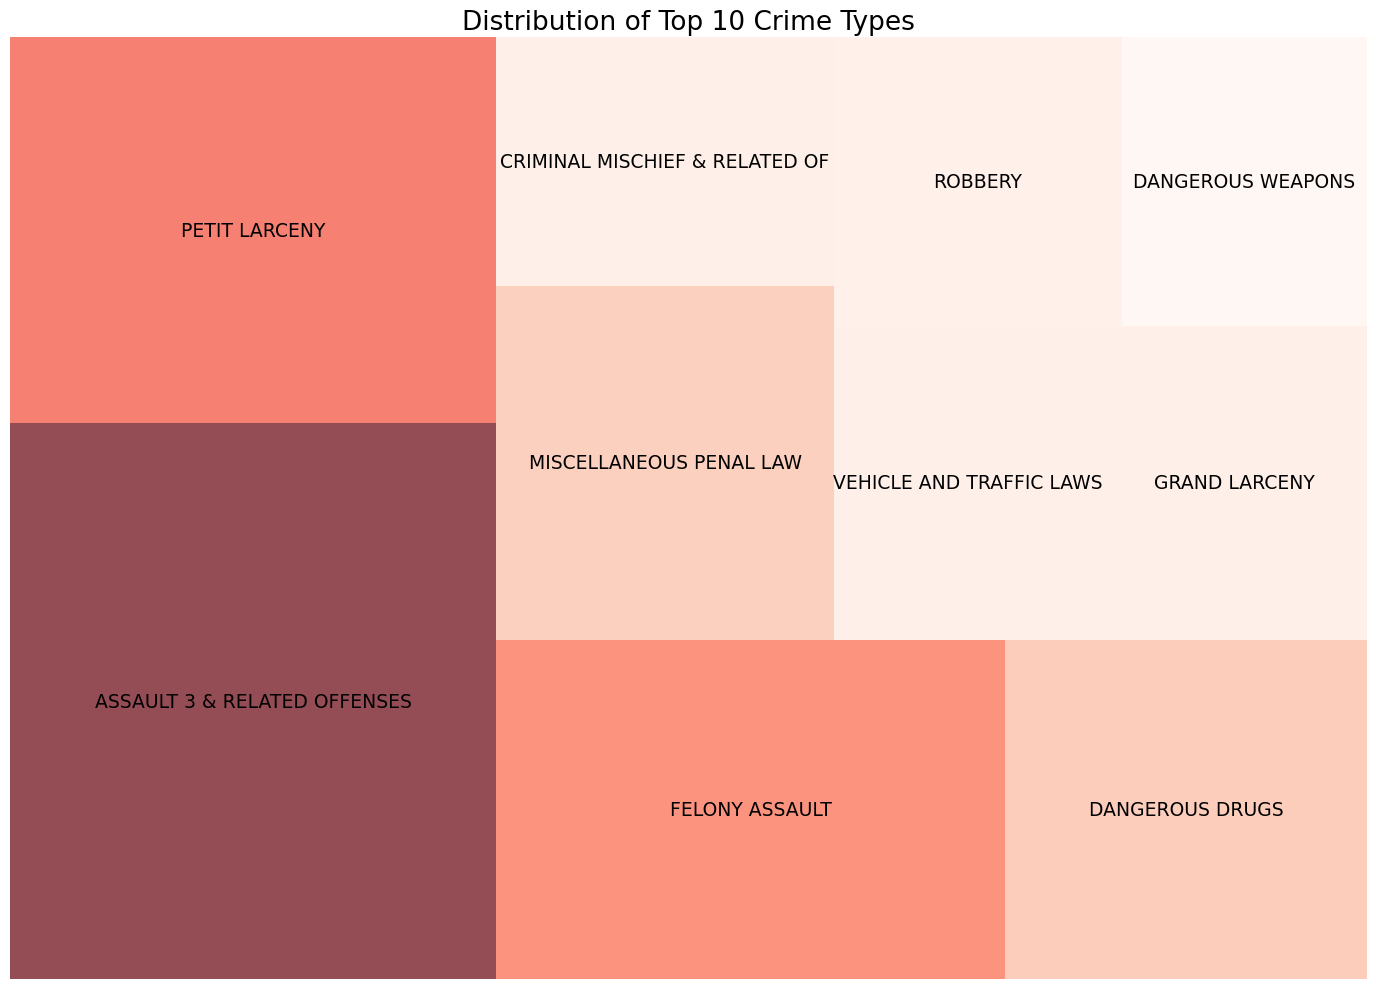

In [ ]:
crime_counts = data['OFNS_DESC'].value_counts()

top_crime_counts = crime_counts.head(10)

norm = plt.Normalize(vmin=top_crime_counts.min(), vmax=top_crime_counts.max())
colors = plt.cm.Reds(norm(top_crime_counts.values))

plt.figure(figsize=(14, 10))
squarify.plot(sizes=top_crime_counts, label=top_crime_counts.index, color=colors, alpha=0.7,
              text_kwargs={'fontsize': 13.5})
plt.title('Distribution of Top 10 Crime Types', fontsize=19)
plt.axis('off')
plt.tight_layout()
plt.show()


### **Crime Trends Over Time**
How have specific crime categories increased or decreased?

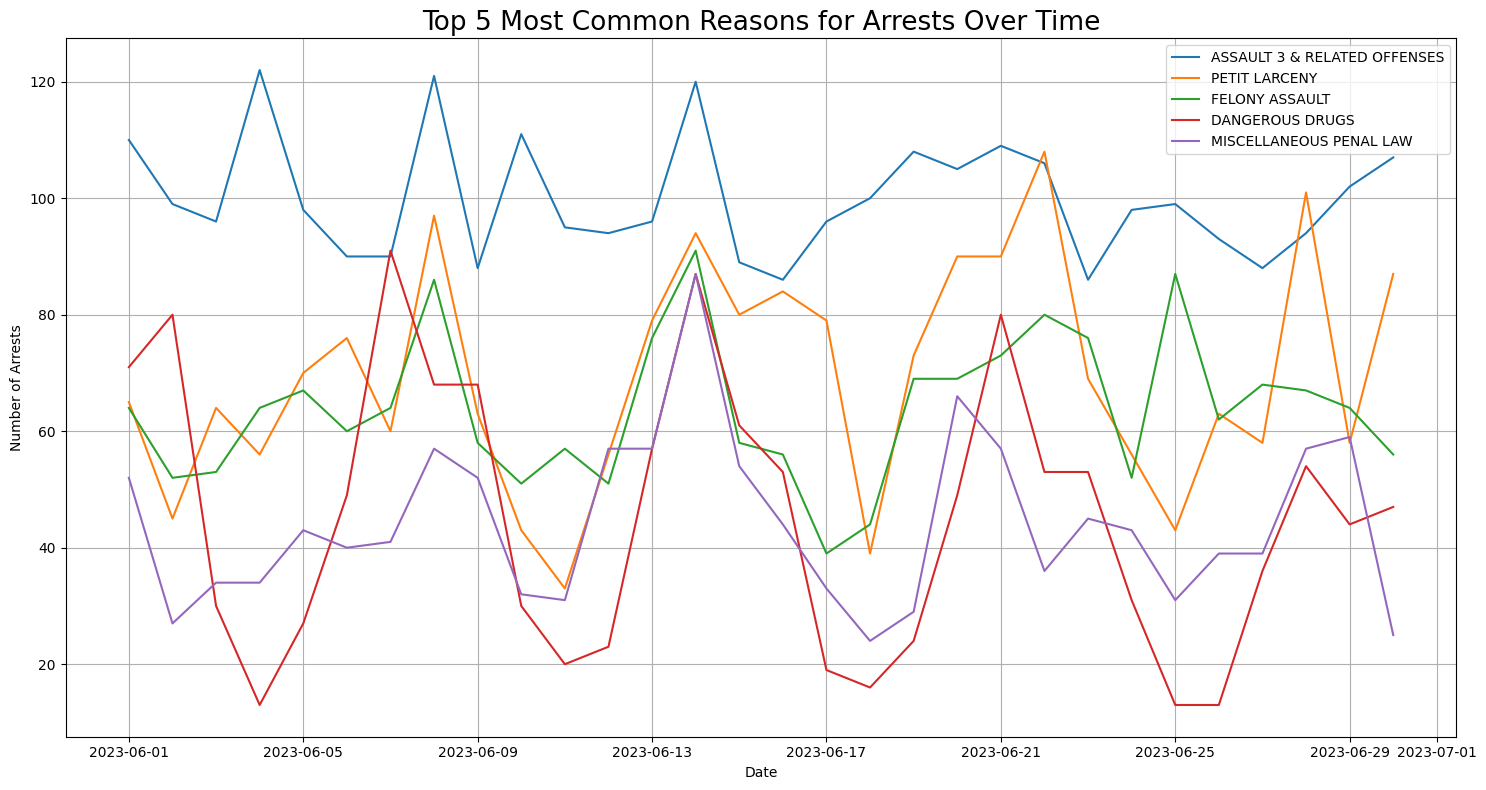

In [ ]:
crime_counts = data['OFNS_DESC'].value_counts()

top_5_crimes = crime_counts.head(5).index

top_5_data = data[data['OFNS_DESC'].isin(top_5_crimes)]

grouped_data = top_5_data.groupby([top_5_data.index, 'OFNS_DESC']).size().unstack()

plt.figure(figsize=(15, 8))
for crime in top_5_crimes:
    plt.plot(grouped_data.index, grouped_data[crime], label=crime)

plt.title('Top 5 Most Common Reasons for Arrests Over Time', fontsize=19)
plt.xlabel('Date')
plt.ylabel('Number of Arrests')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Gender Distribution Across Crime Types**
In major crime categories, which gender is more frequently arrested?

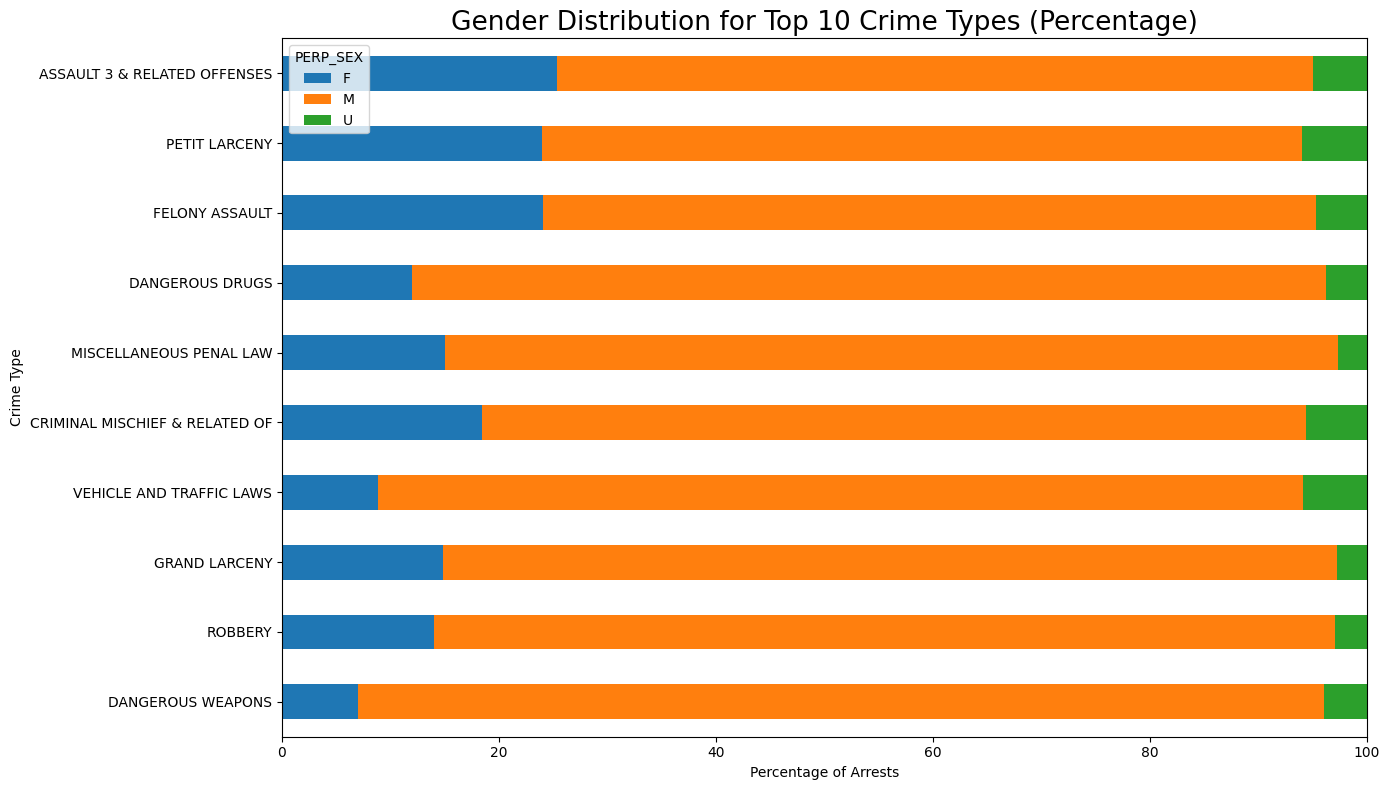

In [ ]:
grouped_data = data.groupby(['OFNS_DESC', 'PERP_SEX']).size().unstack()

grouped_data = grouped_data.fillna(0)
grouped_data['Total'] = grouped_data.sum(axis=1)

top_10_crimes = grouped_data.sort_values(by='Total', ascending=False).head(10)
top_10_crimes_normalized = top_10_crimes.div(top_10_crimes['Total'], axis=0) * 100
top_10_crimes_normalized.drop('Total', axis=1, inplace=True)

ax = top_10_crimes_normalized.plot(kind='barh', stacked=True, figsize=(14, 8))
ax.set_xlim(0, 100)
plt.title('Gender Distribution for Top 10 Crime Types (Percentage)', fontsize=19)
plt.xlabel('Percentage of Arrests')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


In [ ]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date.csv')
df.head()

<ipython-input-43-20996662369d>:1: DtypeWarning: Columns (0,1,2,3,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date.csv')


,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,6/1/23,"MURDER,UNCLASSIFIED",MURDER & NON-NEGL. MANSLAUGHTE,K,69.0,25-44,M,BLACK,40.648698,-73.905128
1,6/1/23,RECKLESS ENDANGERMENT 2,OFFENSES AGAINST THE PERSON,S,120.0,25-44,M,WHITE HISPANIC,40.620679,-74.077406
2,6/1/23,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,Q,110.0,25-44,M,WHITE HISPANIC,40.745365,-73.888333
3,6/1/23,"TRAFFIC,UNCLASSIFIED MISDEMEAN",VEHICLE AND TRAFFIC LAWS,S,120.0,25-44,F,WHITE,40.628452,-74.090318
4,6/1/23,"PUBLIC ADMINISTATION,UNCLASS M",OFFENSES AGAINST PUBLIC ADMINI,Q,105.0,25-44,M,BLACK,40.717777,-73.737641


### **Top crimes in each borough**

<Figure size 1200x800 with 0 Axes>

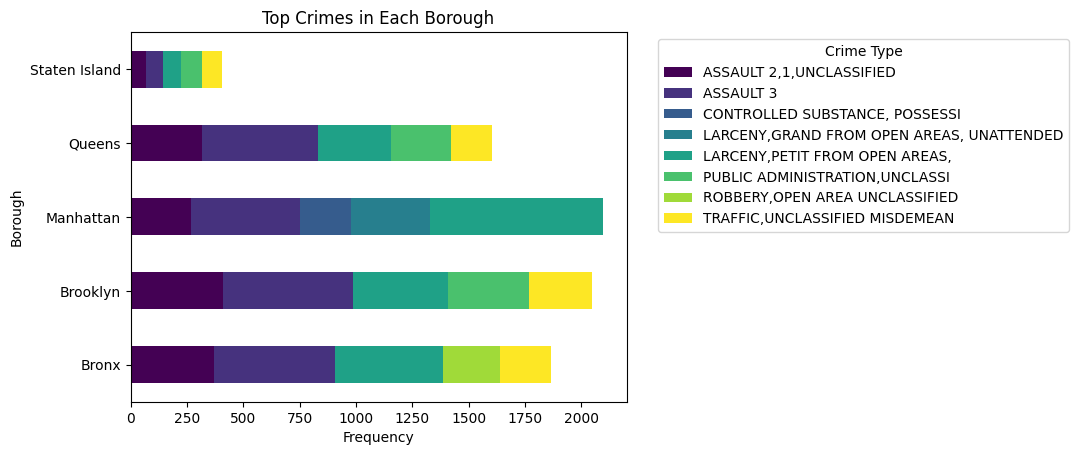

In [ ]:
# Top crimes in each borough
borough_mapping = {
    'K': 'Brooklyn',
    'S': 'Staten Island',
    'Q': 'Queens',
    'M': 'Manhattan',
    'B': 'Bronx'
}

df['ARREST_BORO'] = df['ARREST_BORO'].map(borough_mapping)
borough_groups = df.groupby('ARREST_BORO')
top_crimes_by_borough = {}
top_n_crimes = 5

for borough, group in borough_groups:
    top_crimes = group['PD_DESC'].value_counts().head(top_n_crimes)
    top_crimes_by_borough[borough] = top_crimes

top_crimes_df = pd.DataFrame(top_crimes_by_borough)
top_crimes_df = top_crimes_df.T

# Visualization part

plt.figure(figsize=(12, 8))
top_crimes_df.plot(kind='barh', stacked=True, colormap='viridis')
plt.title('Top Crimes in Each Borough')
plt.xlabel('Frequency')
plt.ylabel('Borough')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



### **Top 10 crime types heatmap**


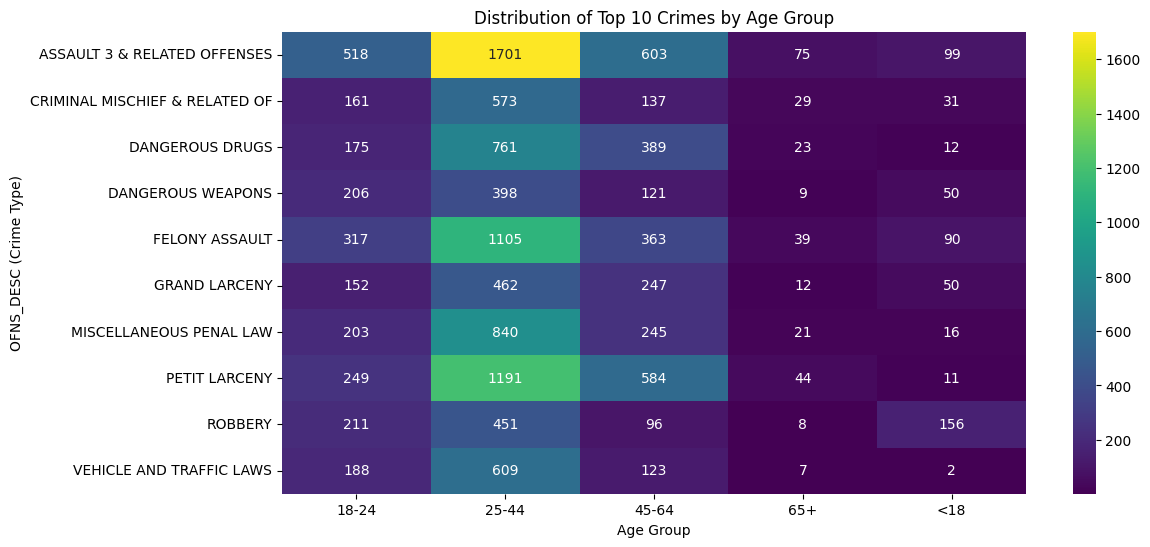

In [ ]:
# Top 10 crime types heatmap
top_10_crime_types = df['OFNS_DESC'].value_counts().nlargest(10).index.tolist()

df_filtered = df[df['OFNS_DESC'].isin(top_10_crime_types)]

pivot_table = df_filtered.pivot_table(index='OFNS_DESC', columns='AGE_GROUP', values='ARREST_DATE', aggfunc='count', fill_value=0)


plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.title('Distribution of Top 10 Crimes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('OFNS_DESC (Crime Type)')
plt.show()


### **Box Plots for demographics and Crime types**

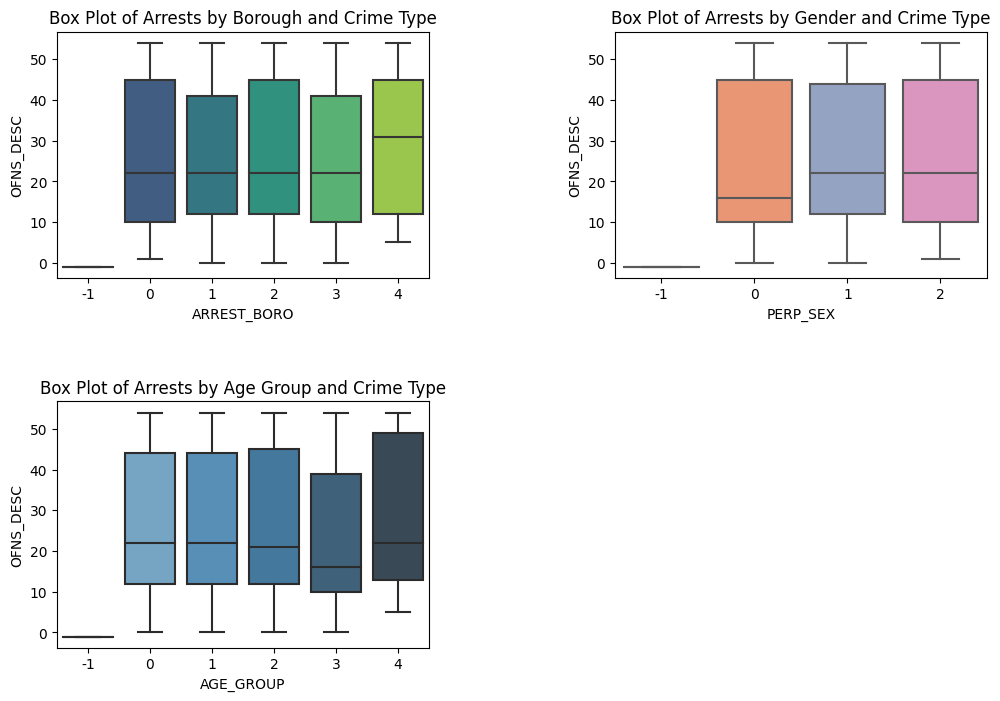

In [ ]:
# Box plots to visualize the distribution of numeric variables
data['ARREST_BORO'] = pd.Categorical(data['ARREST_BORO']).codes
data['PERP_SEX'] = pd.Categorical(data['PERP_SEX']).codes
data['AGE_GROUP'] = pd.Categorical(data['AGE_GROUP']).codes
data['OFNS_DESC'] = pd.Categorical(data['OFNS_DESC']).codes

plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(data=data, x='ARREST_BORO', y='OFNS_DESC', palette='viridis')
plt.title('Box Plot of Arrests by Borough and Crime Type')

plt.subplot(222)
sns.boxplot(data=data, x='PERP_SEX', y='OFNS_DESC', palette='Set2')
plt.title('Box Plot of Arrests by Gender and Crime Type')

plt.subplot(223)
sns.boxplot(data=data, x='AGE_GROUP', y='OFNS_DESC', palette='Blues_d')
plt.title('Box Plot of Arrests by Age Group and Crime Type')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
